In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("F:\\homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
1,2600,4,120.0
10,1800,3,82.0
5,1170,2,38.0
19,800,1,32.0
7,3300,4,155.0


In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [5]:
scaled_y=scaled_y.reshape(1,20)

In [6]:
scaled_y

array([[0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
        0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
        0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
        0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ]])

In [7]:
import random
def mini_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list_mini = []
    epoch_list_mini = []
    
    for i in range(epochs):
        sample_x=np.ones((5,2))
        sample_y=np.ones((1,5))
        for k in range(0,5):
            n = random.randint(0,total_samples-1)
#             randomlist.append(n)
            sample_x[k]=X[n]
            sample_y[0][k]=y_true[0][n]
        y_predicted = np.dot(w, X.T) + b
        w_grad = -(2/total_samples)*np.dot(y_true-y_predicted,X)
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        print('hiiiiiiiiiiiiiiiii')
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        print(i)
        if i%10==0:
            cost_list_mini.append(cost)
            epoch_list_mini.append(i)
        
    return w, b, cost, cost_list_mini, epoch_list_mini

w1, b1, cost1, cost_list_min, epoch_list_min = mini_gradient_descent(scaled_X,scaled_y,120)
w1, b1, cost1

hiiiiiiiiiiiiiiiii
0
hiiiiiiiiiiiiiiiii
1
hiiiiiiiiiiiiiiiii
2
hiiiiiiiiiiiiiiiii
3
hiiiiiiiiiiiiiiiii
4
hiiiiiiiiiiiiiiiii
5
hiiiiiiiiiiiiiiiii
6
hiiiiiiiiiiiiiiiii
7
hiiiiiiiiiiiiiiiii
8
hiiiiiiiiiiiiiiiii
9
hiiiiiiiiiiiiiiiii
10
hiiiiiiiiiiiiiiiii
11
hiiiiiiiiiiiiiiiii
12
hiiiiiiiiiiiiiiiii
13
hiiiiiiiiiiiiiiiii
14
hiiiiiiiiiiiiiiiii
15
hiiiiiiiiiiiiiiiii
16
hiiiiiiiiiiiiiiiii
17
hiiiiiiiiiiiiiiiii
18
hiiiiiiiiiiiiiiiii
19
hiiiiiiiiiiiiiiiii
20
hiiiiiiiiiiiiiiiii
21
hiiiiiiiiiiiiiiiii
22
hiiiiiiiiiiiiiiiii
23
hiiiiiiiiiiiiiiiii
24
hiiiiiiiiiiiiiiiii
25
hiiiiiiiiiiiiiiiii
26
hiiiiiiiiiiiiiiiii
27
hiiiiiiiiiiiiiiiii
28
hiiiiiiiiiiiiiiiii
29
hiiiiiiiiiiiiiiiii
30
hiiiiiiiiiiiiiiiii
31
hiiiiiiiiiiiiiiiii
32
hiiiiiiiiiiiiiiiii
33
hiiiiiiiiiiiiiiiii
34
hiiiiiiiiiiiiiiiii
35
hiiiiiiiiiiiiiiiii
36
hiiiiiiiiiiiiiiiii
37
hiiiiiiiiiiiiiiiii
38
hiiiiiiiiiiiiiiiii
39
hiiiiiiiiiiiiiiiii
40
hiiiiiiiiiiiiiiiii
41
hiiiiiiiiiiiiiiiii
42
hiiiiiiiiiiiiiiiii
43
hiiiiiiiiiiiiiiiii
44
hiiiiiiiiiiiiiiiii
4

(array([[0.80866182, 0.77657351]]), -0.30553842324506336, 0.01439531640098439)

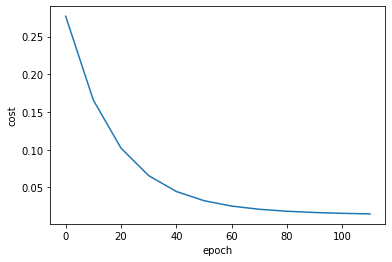

In [8]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_min,cost_list_min)

In [9]:
epoch_list_min

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]